# Further Analysis and Modelling
Having engineered some features and done a little cleaning I will take a deeper look into the variables. Firstly, I will check that the data is appropriate by investigating the different variables. Then I'll peform statistical analysis on the features to help determine which are the most useful. Finally, I'll build a model.

## First Steps

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [50]:
df = pd.read_csv(r'./cleaned_texts_with_codes2.csv')
df.head()

,Level,Text,present_simple_total,imperfect_past_total,simple_past_total,simple_future_total,conditional_total,present_subjunctive_total,imperfect_subjunctive_total,gerund_total,imperative_total,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
0,1,Hazlo por tu padre o por tu madre.Aguanta por ...,16,0,0,0,1,4,0,2,0,181,23,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...","[('Hazlo', 'np00000'), ('por', 'sp000'), ('tu'...",0.695652,0.00000,0.000000,0.000000,0.043478,0.173913,0.00000,0.086957,0.000000,0,1,1,0,0,0,1,1,0,0.237569,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...",7.240000,0.640884
1,1,1. ¿En qué se parece un esqueleto a una comida...,15,0,2,0,1,0,0,0,2,135,20,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...","[('1.', 'z0'), ('¿En', 'vmm0000'), ('qué', 'pt...",0.750000,0.00000,0.100000,0.000000,0.050000,0.000000,0.00000,0.000000,0.100000,0,0,1,0,1,0,1,0,1,0.251852,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...",6.428571,0.577778
2,1,Hola soy Beatriz y estamos al frente de la Igl...,44,0,1,5,0,5,0,2,2,389,59,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...","[('Hola', 'i'), ('soy', 'vsip000'), ('Beatriz'...",0.745763,0.00000,0.016949,0.084746,0.000000,0.084746,0.00000,0.033898,0.033898,0,1,1,1,1,0,0,1,1,0.239075,"['Hola', 'soy', 'Beatriz', 'y', 'estamos', 'al...",6.015873,0.437995
3,1,Si te conceden tres deseos en este momento ¿qu...,23,0,5,0,0,10,0,1,4,347,43,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...","[('Si', 'cs'), ('te', 'pp000000'), ('conceden'...",0.534884,0.00000,0.116279,0.000000,0.000000,0.232558,0.00000,0.023256,0.093023,0,1,1,0,1,0,0,1,1,0.259366,"['Si', 'te', 'conceden', 'tres', 'deseos', 'en...",5.073529,0.495652
4,1,¿Se las diste?. ¿Qué decías ?. ¿Se siente como...,15,1,15,3,2,3,1,0,1,249,41,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...","[('¿Se', 'vmm0000'), ('las', 'da0000'), ('dist...",0.365854,0.02439,0.365854,0.073171,0.048780,0.073171,0.02439,0.000000,0.024390,1,1,1,1,1,1,1,0,1,0.293173,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...",4.333333,0.429150


In [51]:
#Dropping the verb tense totals as they arn't useful for analysis
df = df.drop(['present_simple_total', 'imperfect_past_total',
       'simple_past_total', 'simple_future_total', 'conditional_total',
       'present_subjunctive_total', 'imperfect_subjunctive_total',
       'gerund_total', 'imperative_total'], 1)

In [52]:
df.describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3.764706,366.474153,41.370766,0.533811,0.103324,0.169766,0.040128,0.020151,0.058393,0.017129,0.040615,0.016684,0.367201,0.705882,0.969697,0.442068,0.793226,0.602496,0.374332,0.625668,0.367201,0.267279,15.634088,0.544741
std,1.403402,217.850448,25.435102,0.278378,0.147879,0.177935,0.088712,0.040158,0.067493,0.032676,0.046042,0.033237,0.482472,0.456052,0.171573,0.497076,0.405353,0.489819,0.484382,0.484382,0.482472,0.065740,7.740254,0.101274
min,1.000000,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166667,0.101770
25%,3.000000,182.000000,21.000000,0.309524,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230645,9.735294,0.475138
50%,4.000000,319.000000,37.000000,0.583333,0.037037,0.108696,0.000000,0.000000,0.040816,0.000000,0.028169,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.268765,15.214286,0.534314
75%,5.000000,532.000000,56.000000,0.750000,0.156863,0.281250,0.042857,0.026316,0.085106,0.024390,0.066667,0.023256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.309524,20.125000,0.616740
max,6.000000,1005.000000,134.000000,1.000000,0.857143,0.777778,0.700000,0.415094,0.440000,0.250000,0.250000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510345,47.818182,0.809524


In [53]:
df.columns

Index(['Level', 'Text', 'length', 'total_verbs', 'words_list', 'tags', 'present_simple_prop', 'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop', 'is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative', 'most_common_per', 'new_words_list', 'av_sent_length', 'unique_word_prop'], dtype='object')

## Initial Thoughts
From the initial analysis that was done whislt cleaning there are some specific factors I would like to explore:

- There are very few A1 texts: This is difficult to avoid as, due to the limited capabilities of A1 students, very few texts are created for them. Hopefully, as A1 is the easiest to define this will not be too much of a problem. I'll look into the A1 texts and make sure they represent the level well.

- The presence of verb tenses don't match my expectations: According to curriculums the introduction of different verb tenses occurs in a specific order. Conditional Tense is supposed to be introduced in B1 and imperfect subjunctive is supposed to be introduced properly in B2. However, both of these verbs are present even in some A1 texts. I will look into the lower level texts in which these verbs occur and see what's going on there.

- Figure out the best way to express the verb data: Right now there are columns for verb tense proportions and presence of verb tenses. I would like to identify which is the better one to use for each verb tense and which should be included at all.

### Looking at A1

In [54]:
df[df.Level == 1].describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.0,189.909091,26.590909,0.830250,0.012984,0.048818,0.008515,0.011814,0.042659,0.001109,0.024623,0.019229,0.045455,0.454545,1.0,0.136364,0.500000,0.181818,0.227273,0.363636,0.318182,0.309845,9.097510,0.599853
std,0.0,95.087884,15.095440,0.177128,0.045774,0.083613,0.023710,0.022488,0.065493,0.005200,0.039538,0.036119,0.213201,0.509647,0.0,0.351250,0.511766,0.394771,0.428932,0.492366,0.476731,0.051199,3.564798,0.085620
min,1.0,85.000000,11.000000,0.365854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201646,3.240000,0.429150
25%,1.0,113.000000,15.250000,0.758929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276537,6.434524,0.561717
50%,1.0,134.500000,19.000000,0.869748,0.000000,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.313298,9.099462,0.612439
75%,1.0,258.750000,37.750000,0.986111,0.000000,0.058824,0.000000,0.000000,0.071429,0.000000,0.046936,0.025328,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.350354,10.460000,0.665789
max,1.0,389.000000,60.000000,1.000000,0.214286,0.365854,0.084746,0.058824,0.232558,0.024390,0.142857,0.116667,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,16.750000,0.727273


Looking at the means for the columns stating whether or not a verb tense is present it shows that 20% of the texts contain the conditional tense and 5% (1 text) contains the imperfect subjunctive. 

In [55]:
#Checking the A1 text with the imperfect Subjunctive
df.loc[(df.Level == 1) & (df.is_imperfect_subjunctive == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
4,1,¿Se las diste?. ¿Qué decías ?. ¿Se siente como...,249,41,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...","[('¿Se', 'vmm0000'), ('las', 'da0000'), ('dist...",0.365854,0.02439,0.365854,0.073171,0.04878,0.073171,0.02439,0.0,0.02439,1,1,1,1,1,1,1,0,1,0.293173,"['¿Se', 'las', 'diste?.', '¿Qué', 'decías', '?...",4.333333,0.42915


In [56]:
#This text is obviously way above A1, deleting time
print(df.loc[4].Text)

¿Se las diste?. ¿Qué decías ?. ¿Se siente como dar un paseo.. Ellos nos lo dieron.. Juan se lo dio.. Nosotros se los dimos.. María te va a dar el dinero.. ¿A quién diste el dinero?. María le va a dar el dinero.. ¿Me pudiera dar un asiento de ventana por favor?. He oído que...... Juan dijo que estaría esperándonos.. Sí se lo he dado.. Él dijo que iría.. Se lo doy a él.. No señor no me dijeron nada.. Se lo doy a él.. Es interesante que digas eso.. Yo se lo daré.. Me dijo que fue a verlo.. María danos el dinero.. ¡ No me digas lo que significa !. Si me dieron muchos.. ¡No escuches lo que dice!. Yo no te puedo dar el dinero hoy. Dijo que empezarías mañana.. Sí se lo he dicho.. pero te lo voy a poder dar mañana.. No no le hemos dicho nada.. Ella me dio el dinero.. ¿A quién se lo has dicho?. Yo te lo daré.. Él salió sin decir adios.. Yo te lo di.. No no podría decirle.. Yo se lo daré a ella mañana.. Elenita me dijo que te saludara.. Nosotros se lo daremos a ella mañana.. ¿Por qué le dijiste 

In [57]:
df = df.drop([4])

In [58]:
#Checking the A1's that contain conditional tense
#Apart from 0 and 1(which are definitely above A1), these look okay.
#It makes sense for lower level texts to include the occasional word or tense above it's level, that seems to be the case here.
df.loc[(df.Level == 1) & (df.is_condtional == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
0,1,Hazlo por tu padre o por tu madre.Aguanta por ...,181,23,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...","[('Hazlo', 'np00000'), ('por', 'sp000'), ('tu'...",0.695652,0.0,0.000000,0.000000,0.043478,0.173913,0.0,0.086957,0.000000,0,1,1,0,0,0,1,1,0,0.237569,"['Hazlo', 'por', 'tu', 'padre', 'o', 'por', 't...",7.240000,0.640884
1,1,1. ¿En qué se parece un esqueleto a una comida...,135,20,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...","[('1.', 'z0'), ('¿En', 'vmm0000'), ('qué', 'pt...",0.750000,0.0,0.100000,0.000000,0.050000,0.000000,0.0,0.000000,0.100000,0,0,1,0,1,0,1,0,1,0.251852,"['1.', '¿En', 'qué', 'se', 'parece', 'un', 'es...",6.428571,0.577778
8,1,¡Buenas tardes señor!. Quiero ir al hotel San ...,243,34,"['¡Buenas', 'tardes', 'señor!.', 'Quiero', 'ir...","[('¡Buenas', 'vaic000'), ('tardes', 'nc0p000')...",0.794118,0.0,0.058824,0.029412,0.058824,0.029412,0.0,0.000000,0.029412,0,1,1,1,1,0,1,0,1,0.201646,"['¡Buenas', 'tardes', 'señor!.', 'Quiero', 'ir...",3.240000,0.559671
433,1,Consultorio de libros Hoy tengo una cita en el...,130,17,"['Consultorio', 'de', 'libros', 'Hoy', 'tengo'...","[('Consultorio', 'np00000'), ('de', 'sp000'), ...",0.882353,0.0,0.058824,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,0,0,1,0,1,0,1,0,0,0.300000,"['Consultorio', 'de', 'libros', 'Hoy', 'tengo'...",13.000000,0.646154


In [59]:
print(df.loc[1].Text)

1. ¿En qué se parece un esqueleto a una comida de viernes? En que le falta la carne.. 2. ¿Qué es lo que va de Madrid a Toledo sin moverse? El camino.. 3. ¿En qué se parece un gallo a un monte? En la cresta.. 4. ¿Por qué en invierno sale tarde el sol? Porque como hace frío no le da la gana de madrugar.. 5. ¿Por qué es más frío el aire en el invierno que en el verano? Porque en el invierno le cierran las puertas de las casas y tiene que estarse en la calle.. 6. ¿Qué es lo que se nos aparece una vez en un minuto dos veces en un momento y nunca en un siglo? La letra M.. 7. ¿En qué estado se coge un cordero para matarlo? Vivo.


In [60]:
df = df.drop([0, 1])

Looking through the A1 texts highlights the potential unreliability of the levels. The main source used was Readlang, a site where users can upload texts with their own estimation of the level, this naturally would lead to some inconsistencies in level labelling. As such, It's going to be very important to investigate outliers and variables (such as verb tenses) which don't look quite right. 

In [61]:
#Checking A2
#Not unreasonably high presence of condtional but I'll check out the ones with imperfect subjunctive
df[df.Level == 2].describe()

,Level,length,total_verbs,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,av_sent_length,unique_word_prop
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.0,287.459184,38.867347,0.634818,0.087727,0.160203,0.019411,0.004657,0.038997,0.007051,0.021001,0.026136,0.173469,0.561224,0.989796,0.295918,0.765306,0.530612,0.122449,0.377551,0.500000,0.277727,9.301035,0.518816
std,0.0,173.908980,25.970895,0.283619,0.137953,0.178381,0.053194,0.015844,0.060991,0.021879,0.042006,0.038767,0.380599,0.498789,0.101015,0.458801,0.425986,0.501628,0.329489,0.487267,0.502571,0.063756,4.462638,0.113889
min,2.0,58.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077778,3.212121,0.190068
25%,2.0,165.000000,19.000000,0.435952,0.000000,0.019734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.240370,6.173051,0.434477
50%,2.0,232.500000,32.000000,0.696154,0.018182,0.083333,0.000000,0.000000,0.020417,0.000000,0.000000,0.006098,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.283662,8.365185,0.551342
75%,2.0,353.500000,49.500000,0.880000,0.120066,0.276515,0.017779,0.000000,0.053698,0.000000,0.026316,0.044444,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.315408,11.195076,0.607965
max,2.0,1005.000000,132.000000,1.000000,0.600000,0.643939,0.433333,0.120000,0.428571,0.142857,0.250000,0.272727,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,27.000000,0.766667


In [62]:
#Having taken a look at a few of these it seems reasonable for the subjunctive to appear at an A2 level reading
#Used sparingly the reader can understand this tense from context
df.loc[(df.Level == 2) & (df.is_imperfect_subjunctive == 1)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
14,2,LOS TRES BARCOS. Cierto hombre rico tenía tres...,865,132,"['LOS', 'TRES', 'BARCOS.', 'Cierto', 'hombre',...","[('LOS', 'da0000'), ('TRES', 'dn0000'), ('BARC...",0.045455,0.219697,0.643939,0.000000,0.053030,0.022727,0.007576,0.007576,0.000000,1,1,1,0,1,1,1,1,0,0.345665,"['LOS', 'TRES', 'BARCOS.', 'Cierto', 'hombre',...",12.013889,0.279769
15,2,DON JUAN BOLONDRÓN. Una vez había un pobre zap...,576,71,"['DON', 'JUAN', 'BOLONDRÓN.', 'Una', 'vez', 'h...","[('DON', 'nc0s000'), ('JUAN', 'np00000'), ('BO...",0.140845,0.352113,0.422535,0.000000,0.000000,0.028169,0.014085,0.028169,0.014085,1,1,1,0,1,1,0,1,1,0.300347,"['DON', 'JUAN', 'BOLONDRÓN.', 'Una', 'vez', 'h...",12.000000,0.409722
16,2,LOS TRES OSOS. Cerca de un bosque hermoso viví...,581,82,"['LOS', 'TRES', 'OSOS.', 'Cerca', 'de', 'un', ...","[('LOS', 'da0000'), ('TRES', 'dn0000'), ('OSOS...",0.048780,0.548780,0.353659,0.000000,0.000000,0.024390,0.012195,0.000000,0.012195,1,1,1,0,1,1,0,0,1,0.304647,"['LOS', 'TRES', 'OSOS.', 'Cerca', 'de', 'un', ...",10.962264,0.320138
22,2,Hoy es día de clase. Como todas las mañanas Ma...,275,38,"['Hoy', 'es', 'día', 'de', 'clase.', 'Como', '...","[('Hoy', 'nc0s000'), ('es', 'vsip000'), ('día'...",0.815789,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.000000,1,1,1,1,1,1,1,1,0,0.283636,"['Hoy', 'es', 'día', 'de', 'clase.', 'Como', '...",10.576923,0.494545
25,2,Lucas 4 Nueva Versión Internacional (NVI). Ten...,243,36,"['Lucas', '4', 'Nueva', 'Versión', 'Internacio...","[('Lucas', 'np00000'), ('4', 'z0'), ('Nueva', ...",0.222222,0.000000,0.416667,0.111111,0.000000,0.138889,0.027778,0.027778,0.055556,1,1,1,1,1,0,0,1,1,0.197531,"['Lucas', '4', 'Nueva', 'Versión', 'Internacio...",11.571429,0.633745
26,2,Libertad una palabra enorme. 1. Libertad es un...,293,55,"['Libertad', 'una', 'palabra', 'enorme.', '1.'...","[('Libertad', 'np00000'), ('una', 'di0000'), (...",0.763636,0.018182,0.036364,0.018182,0.018182,0.090909,0.018182,0.018182,0.018182,1,1,1,1,1,1,1,1,1,0.399317,"['Libertad', 'una', 'palabra', 'enorme.', '1.'...",10.464286,0.433447
28,2,Duolingo Stories 02-02 Tres deseos. GENIO: ¡Tu...,183,24,"['Duolingo', 'Stories', '02-02', 'Tres', 'dese...","[('Duolingo', 'np00000'), ('Stories', 'np00000...",0.583333,0.041667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.083333,1,1,1,1,1,1,1,1,1,0.234973,"['Duolingo', 'Stories', '02-02', 'Tres', 'dese...",5.718750,0.573770
30,2,El niño al que se le murió el amigo. [Minicuen...,296,38,"['El', 'niño', 'al', 'que', 'se', 'le', 'murió...","[('El', 'da0000'), ('niño', 'nc0s000'), ('al',...",0.157895,0.184211,0.552632,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,1,1,1,0,1,1,0,0,0,0.371622,"['El', 'niño', 'al', 'que', 'se', 'le', 'murió...",14.095238,0.472973
33,2,Hay golpes en la vida tan fuertes... ¡Yo no sé...,149,10,"['Hay', 'golpes', 'en', 'la', 'vida', 'tan', '...","[('Hay', 'vaip000'), ('golpes', 'nc0p000'), ('...",0.700000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,1,0,1,1,0,0,0,0,1,0.228188,"['Hay', 'golpes', 'en', 'la', 'vida', 'tan', '...",6.208333,0.583893
41,2,Historia 8. (Esta es la historia de Luisa una ...,157,25,"['Historia', '8.', '(Esta', 'es', 'la', 'histo...","[('Historia', 'np00000'), ('8.', 'z0'), ('(Est...",0.880000,0.000000,0.040000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,1,0,1,0,1,0,0,0,0,0.248408,"['Historia', '8.', '(Esta', 'es', 'la', 'histo...",6.240000,0.358974


### Looking at the extremes for certain variables

#### Average Sentence Length

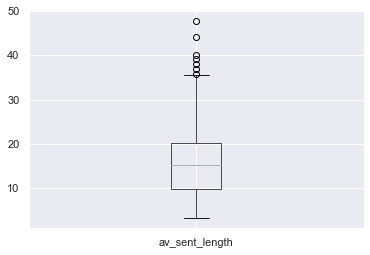

In [63]:
df.boxplot(column = 'av_sent_length')

In [64]:
#Looking at the lower end
df[df.av_sent_length < 5].Level.value_counts()

2    15
3    11
4     4
1     1
Name: Level, dtype: int64

In [65]:
#240 is non-useful will drop
df.loc[(df.av_sent_length < 5) & (df.Level == 4)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
240,4,1. Una mujer estaba en un crucero. (Agnes). 2....,309,46,"['1.', 'Una', 'mujer', 'estaba', 'en', 'un', '...","[('1.', 'z0'), ('Una', 'di0000'), ('mujer', 'n...",0.043478,0.173913,0.717391,0.0,0.0,0.043478,0.021739,0.0,0.000000,1,1,1,0,1,1,0,0,0,0.139159,"['1.', 'Una', 'mujer', 'estaba', 'en', 'un', '...",3.678571,0.592233
242,4,La primavera besaba. La primavera besaba. suav...,72,4,"['La', 'primavera', 'besaba.', 'La', 'primaver...","[('La', 'da0000'), ('primavera', 'nc0s000'), (...",0.000000,0.250000,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.000000,1,1,0,0,1,1,0,0,0,0.208333,"['La', 'primavera', 'besaba.', 'La', 'primaver...",4.235294,0.791667
260,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,219,17,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.764706,0.000000,0.117647,0.0,0.0,0.058824,0.000000,0.0,0.058824,0,1,1,0,1,0,0,0,1,0.146119,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.483333,0.602871
264,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,153,15,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.666667,0.000000,0.200000,0.0,0.0,0.133333,0.000000,0.0,0.000000,0,1,1,0,1,0,0,0,0,0.091503,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.536585,0.641379


In [66]:
df.loc[df.Level == 4]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
180,4,Había una vez una familia de ratones que vivía...,227,26,"['Había', 'una', 'vez', 'una', 'familia', 'de'...","[('Había', 'vaii000'), ('una', 'di0000'), ('ve...",0.115385,0.230769,0.307692,0.192308,0.076923,0.000000,0.000000,0.038462,0.038462,0,0,1,1,1,1,1,1,1,0.290749,"['Había', 'una', 'vez', 'una', 'familia', 'de'...",13.352941,0.616740
181,4,Hoy vamos a hablar sobre la felicidad. A veces...,582,72,"['Hoy', 'vamos', 'a', 'hablar', 'sobre', 'la',...","[('Hoy', 'nc0s000'), ('vamos', 'vmip000'), ('a...",0.750000,0.000000,0.041667,0.027778,0.000000,0.027778,0.000000,0.125000,0.027778,0,1,1,1,1,0,0,1,1,0.360825,"['Hoy', 'vamos', 'a', 'hablar', 'sobre', 'la',...",15.594595,0.495667
182,4,Don Pedro Troncoso falleció por COVID-19 a los...,774,89,"['Don', 'Pedro', 'Troncoso', 'falleció', 'por'...","[('Don', 'np00000'), ('Pedro', 'np00000'), ('T...",0.168539,0.348315,0.426966,0.011236,0.000000,0.022472,0.000000,0.022472,0.000000,0,1,1,1,1,1,0,1,0,0.266150,"['Don', 'Pedro', 'Troncoso', 'falleció', 'por'...",20.368421,0.470284
183,4,Me enamoré del hijo del ministro el invierno q...,406,45,"['Me', 'enamoré', 'del', 'hijo', 'del', 'minis...","[('Me', 'pp000000'), ('enamoré', 'vmis000'), (...",0.022222,0.177778,0.488889,0.000000,0.066667,0.044444,0.066667,0.111111,0.022222,1,1,1,0,1,1,1,1,1,0.221675,"['Me', 'enamoré', 'del', 'hijo', 'del', 'minis...",6.092308,0.578283
184,4,Hola a todos y a todas los seguidores de Spani...,525,59,"['Hola', 'a', 'todos', 'y', 'a', 'todas', 'los...","[('Hola', 'i'), ('a', 'sp000'), ('todos', 'pi0...",0.576271,0.000000,0.033898,0.101695,0.000000,0.203390,0.033898,0.050847,0.000000,1,1,1,1,1,0,0,1,0,0.335238,"['Hola', 'a', 'todos', 'y', 'a', 'todas', 'los...",15.441176,0.464762
185,4,“Cierta tarde Pedro y Juan fueron al templo pa...,639,93,"['“Cierta', 'tarde', 'Pedro', 'y', 'Juan', 'fu...","[('“Cierta', 'vaic000'), ('tarde', 'rg'), ('Pe...",0.161290,0.129032,0.419355,0.064516,0.010753,0.053763,0.043011,0.107527,0.010753,1,1,1,1,1,1,1,1,1,0.264476,"['“Cierta', 'tarde', 'Pedro', 'y', 'Juan', 'fu...",18.794118,0.467919
186,4,Adorando un retrato. La banda « Héroes español...,446,57,"['Adorando', 'un', 'retrato.', 'La', 'banda', ...","[('Adorando', 'vmg0000'), ('un', 'di0000'), ('...",0.140351,0.228070,0.456140,0.017544,0.000000,0.035088,0.035088,0.087719,0.000000,1,1,1,1,1,1,0,1,0,0.226457,"['Adorando', 'un', 'retrato.', 'La', 'banda', ...",12.742857,0.544843
187,4,¡Es viernes! Bienvenido a tu boletín en españo...,704,70,"['¡Es', 'viernes!', 'Bienvenido', 'a', 'tu', '...","[('¡Es', 'i'), ('viernes!', 'nc0s000'), ('Bien...",0.642857,0.014286,0.171429,0.042857,0.000000,0.071429,0.042857,0.014286,0.000000,1,1,1,1,1,1,0,1,0,0.271307,"['¡Es', 'viernes!', 'Bienvenido', 'a', 'tu', '...",14.978723,0.565341
188,4,Hoy queremos compartir con vosotros una receta...,697,91,"['Hoy', 'queremos', 'compartir', 'con', 'vosot...","[('Hoy', 'rg'), ('queremos', 'vmip000'), ('com...",0.835165,0.000000,0.021978,0.021978,0.000000,0.054945,0.010989,0.043956,0.010989,1,1,1,1,1,0,0,1,1,0.266858,"['Hoy', 'queremos', 'compartir', 'con', 'vosot...",10.402985,0.437590
189,4,Empleo mis últimas fuerzas para llegar al bar ...,650,85,"['Empleo', 'mis', 'últimas', 'fuerzas', 'para'...","[('Empleo', 'np00000'), ('mis', 'dp0000'), ('ú...",0.505882,0.141176,0.047059,0.023529,0.058824,0.035294,0.058824,0.129412,0.000000,1,1,1,1,1,1,1,1,0,0.346154,"['Empleo', 'mis', 'últimas', 'fuerzas', 'para'...",19.696970,0.504615


In [67]:
df = df.drop([240])

In [68]:
df.loc[(df.av_sent_length < 5) & (df.Level == 2)]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
21,2,«No te rindas» - Poema de Mario Benedetti. Est...,186,13,"['«No', 'te', 'rindas»', '-', 'Poema', 'de', '...","[('«No', 'vmm0000'), ('te', 'pp000000'), ('rin...",0.846154,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0,1,1,0,0,0,0,0,1,0.177419,"['«No', 'te', 'rindas»', '-', 'Poema', 'de', '...",4.769231,0.575269
27,2,La cita misteriosa. SONIA: Hola mamá ya termin...,144,20,"['La', 'cita', 'misteriosa.', 'SONIA:', 'Hola'...","[('La', 'da0000'), ('cita', 'nc0s000'), ('mist...",0.800000,0.000000,0.050000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,1,1,0,0,0,0,0.187500,"['La', 'cita', 'misteriosa.', 'SONIA:', 'Hola'...",4.800000,0.604167
29,2,Caminante no hay Camino. por Antonio Machado. ...,58,7,"['Caminante', 'no', 'hay', 'Camino.', 'por', '...","[('Caminante', 'aq0000'), ('no', 'rn'), ('hay'...",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0.258621,"['Caminante', 'no', 'hay', 'Camino.', 'por', '...",4.833333,0.586207
31,2,Verso 1. Aun antes de hablar. Ya cantabas sobr...,132,11,"['Verso', '1.', 'Aun', 'antes', 'de', 'hablar....","[('Verso', 'aq0000'), ('1.', 'z0'), ('Aun', 'r...",0.636364,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0,0,1,0,1,0,0,0,1,0.242424,"['Verso', '1.', 'Aun', 'antes', 'de', 'hablar....",4.000000,0.492424
32,2,Canción del pirata. Con diez cañones por banda...,252,11,"['Canción', 'del', 'pirata.', 'Con', 'diez', '...","[('Canción', 'nc0s000'), ('del', 'sp000'), ('p...",0.636364,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.090909,0.000000,0,1,1,0,1,0,0,1,0,0.166667,"['Canción', 'del', 'pirata.', 'Con', 'diez', '...",3.212121,0.575472
43,2,Hola soy Beatriz. Esta vez nos encontramos en ...,551,57,"['Hola', 'soy', 'Beatriz.', 'Esta', 'vez', 'no...","[('Hola', 'i'), ('soy', 'vsip000'), ('Beatriz....",0.684211,0.017544,0.157895,0.017544,0.052632,0.035088,0.000000,0.000000,0.035088,0,1,1,1,1,1,1,0,1,0.205082,"['Hola', 'soy', 'Beatriz.', 'Esta', 'vez', 'no...",4.266129,0.431002
45,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,212,16,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.750000,0.000000,0.187500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0,1,1,0,1,0,0,0,0,0.183962,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.163265,0.534314
48,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,297,28,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.750000,0.000000,0.035714,0.035714,0.000000,0.142857,0.000000,0.000000,0.035714,0,1,1,1,1,0,0,0,1,0.212121,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.000000,0.600694
49,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,331,38,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.736842,0.000000,0.131579,0.000000,0.000000,0.078947,0.000000,0.000000,0.052632,0,1,1,0,1,0,0,0,1,0.193353,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.984615,0.552469
50,2,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,306,37,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.891892,0.000000,0.054054,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0,1,1,0,1,0,0,0,0,0.248366,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",4.615385,0.486667


The texts with low average sentence lengths (<5) are typically conversation scripts with frequent 2 word exchanges or item lists. All of them are appropriately levelled so I'll keep them in.

In [69]:
#At the higher end all the texts with longer sentence length are the top levels as expected
df[df.av_sent_length > 30].Level.value_counts()

6    23
5     4
Name: Level, dtype: int64

##### Percentage of most common spanish words in the text

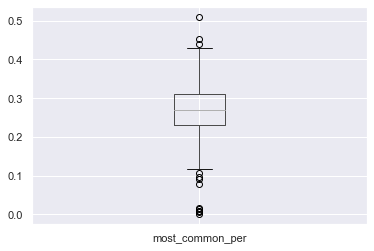

In [70]:
df.boxplot(column = 'most_common_per')

In [71]:
#A number of these are non-Spanish which I'll drop.
#Other than that they look useful.
df[df.most_common_per < 0.1]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
87,2,Preguntando direcciones. - ¡Hola buenos días!....,90,8,"['Preguntando', 'direcciones.', '-', '¡Hola', ...","[('Preguntando', 'vmg0000'), ('direcciones.', ...",0.625000,0.0,0.000000,0.0,0.0,0.125000,0.0,0.25,0.000000,0,1,1,0,0,0,0,1,0,0.077778,"['Preguntando', 'direcciones.', '-', '¡Hola', ...",3.913043,0.622222
154,3,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,289,22,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.818182,0.0,0.136364,0.0,0.0,0.000000,0.0,0.00,0.045455,0,0,1,0,1,0,0,0,1,0.096886,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.197674,0.483636
264,4,MI VIDA LOCA Spanish for beginners. © 2008 BBC...,153,15,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...","[('MI', 'dp0000'), ('VIDA', 'nc0s000'), ('LOCA...",0.666667,0.0,0.200000,0.0,0.0,0.133333,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.091503,"['MI', 'VIDA', 'LOCA', 'Spanish', 'for', 'begi...",3.536585,0.641379
280,5,Five Themes of Geography: STUDY GUIDE. https:/...,202,5,"['Five', 'Themes', 'of', 'Geography:', 'STUDY'...","[('Five', 'np00000'), ('Themes', 'np00000'), (...",0.000000,0.0,0.600000,0.2,0.0,0.200000,0.0,0.00,0.000000,0,1,0,1,1,0,0,0,0,0.009901,"['Five', 'Themes', 'of', 'Geography:', 'STUDY'...",7.461538,0.515464
306,5,"← Back To Documentation. Pressing ""i"" puts the...",109,6,"['←', 'Back', 'To', 'Documentation.', 'Pressin...","[('←', 'nc0s000'), ('Back', 'np00000'), ('To',...",0.500000,0.0,0.166667,0.0,0.0,0.333333,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.009174,"['←', 'Back', 'To', 'Documentation.', 'Pressin...",9.083333,0.669725
383,6,The important of love in our life. When we fal...,157,11,"['The', 'important', 'of', 'love', 'in', 'our'...","[('The', 'np00000'), ('important', 'np00000'),...",0.363636,0.0,0.454545,0.0,0.0,0.000000,0.0,0.00,0.181818,0,0,1,0,1,0,0,0,1,0.000000,"['The', 'important', 'of', 'love', 'in', 'our'...",31.400000,0.515924
402,6,Last Monday there was a suspected gas explosio...,74,4,"['Last', 'Monday', 'there', 'was', 'a', 'suspe...","[('Last', 'np00000'), ('Monday', 'np00000'), (...",0.250000,0.0,0.500000,0.0,0.0,0.250000,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.013514,"['Last', 'Monday', 'there', 'was', 'a', 'suspe...",14.800000,0.729730
416,6,Automatically translated Catalan text:. Aquest...,58,5,"['Automatically', 'translated', 'Catalan', 'te...","[('Automatically', 'np00000'), ('translated', ...",0.400000,0.0,0.400000,0.0,0.0,0.200000,0.0,0.00,0.000000,0,1,1,0,1,0,0,0,0,0.017241,"['Automatically', 'translated', 'Catalan', 'te...",29.000000,0.793103
428,6,Chiang Rai Thailand (CNN)A medical assessment ...,146,5,"['Chiang', 'Rai', 'Thailand', '(CNN)A', 'medic...","[('Chiang', 'np00000'), ('Rai', 'np00000'), ('...",1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0,0,1,0,0,0,0,0,0,0.006849,"['Chiang', 'Rai', 'Thailand', '(CNN)A', 'medic...",29.200000,0.698630


In [72]:
#Dropping english texts
#!!!!Make sure you get the right ones here!!!!
df = df.drop([280, 306, 383, 402, 416, 428])

In [73]:
pd.pivot_table(df, index ='Level', values='most_common_per')

,most_common_per
Level,
1,0.317579
2,0.277727
3,0.277079
4,0.283228
5,0.255035
6,0.233911


### Presenting Verb Tenses
Taking a look at the verb teses that are significant and deciding which are the best ways to represent them for modelling.

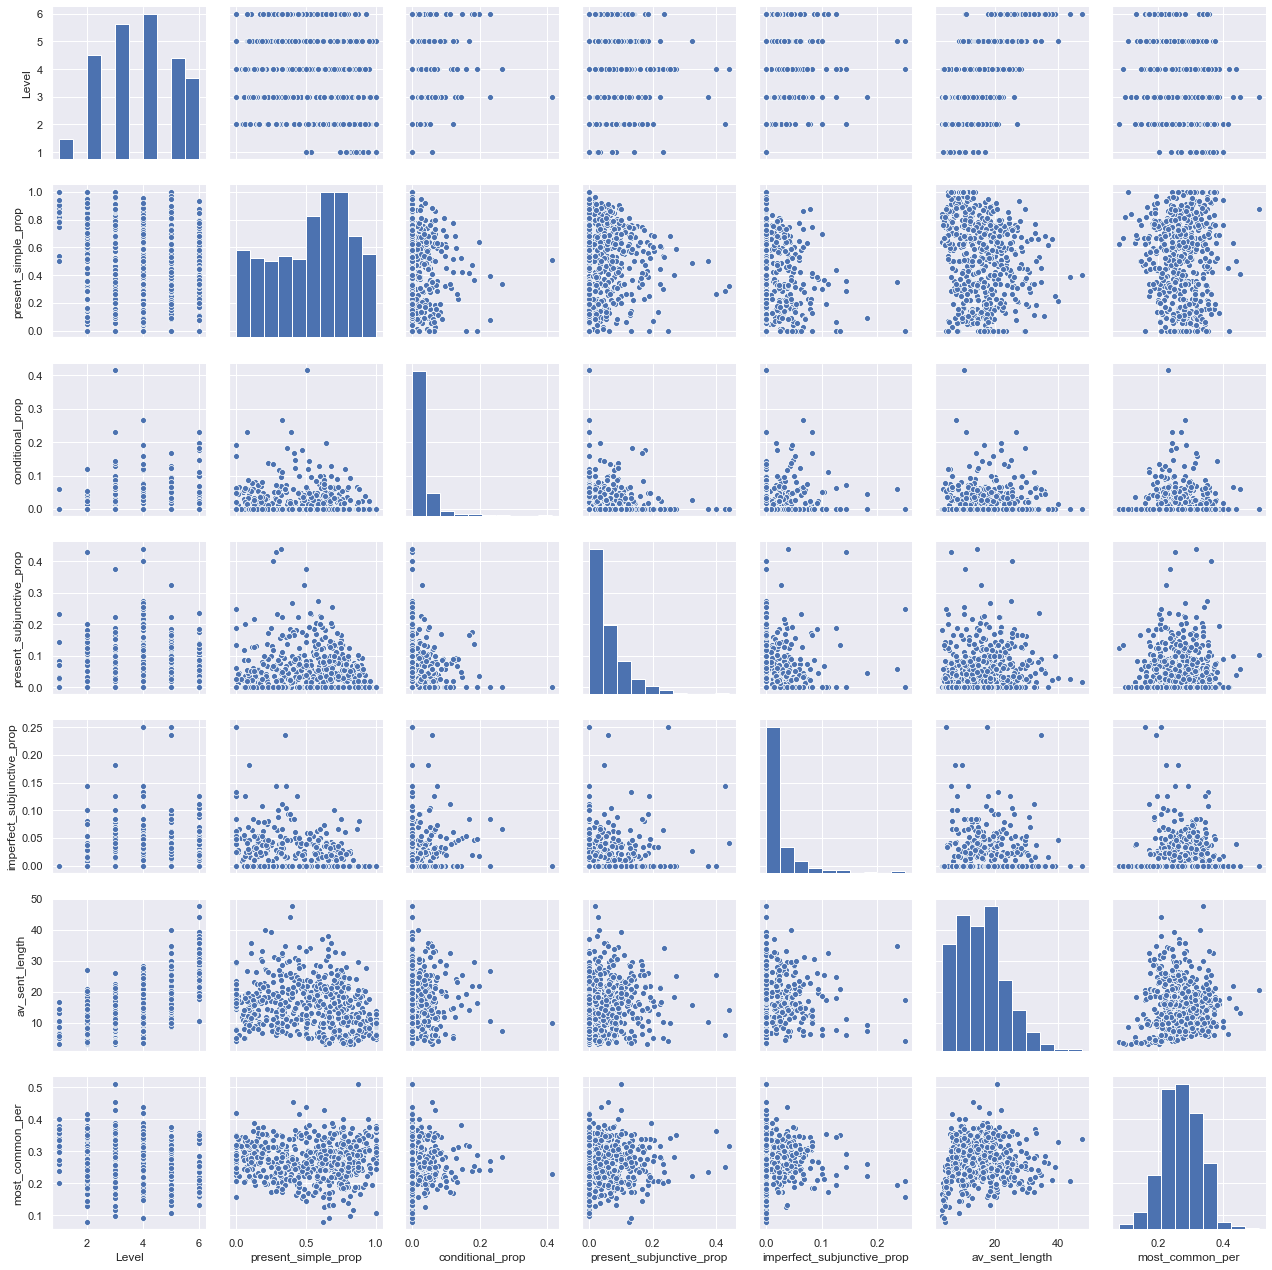

In [74]:
#scatterplot
sns.set()
cols = ['Level', 'present_simple_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'av_sent_length', 'most_common_per']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [75]:
df['most_common_per'].corr(df.av_sent_length)

0.03894724299185177

### Checking the outliers of less common tenses

In [76]:
#Imperative
#From looking at some of these it's clear that the tagger makes a lot of false positives with the imperative
#It would be better not to include this feature when modelling
df[df.imperative_prop > 0.25]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
73,2,No hay que complicar la felicidad Marco Denevi...,320,55,"['No', 'hay', 'que', 'complicar', 'la', 'felic...","[('No', 'rn'), ('hay', 'vaip000'), ('que', 'cs...",0.636364,0.018182,0.018182,0.0,0.0,0.018182,0.036364,0.000000,0.272727,1,1,1,0,1,1,0,0,1,0.128125,"['No', 'hay', 'que', 'complicar', 'la', 'felic...",4.507042,0.425000
253,4,Ausente! La mañana en que me vaya. más lejos d...,85,6,"['Ausente!', 'La', 'mañana', 'en', 'que', 'me'...","[('Ausente!', 'vmm0000'), ('La', 'da0000'), ('...",0.000000,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.166667,0.333333,0,0,0,1,0,0,0,1,1,0.235294,"['Ausente!', 'La', 'mañana', 'en', 'que', 'me'...",5.000000,0.694118


In [77]:
#For the Gerund
#All looks good with the gerund
df[df.gerund_prop > 0.17]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
87,2,Preguntando direcciones. - ¡Hola buenos días!....,90,8,"['Preguntando', 'direcciones.', '-', '¡Hola', ...","[('Preguntando', 'vmg0000'), ('direcciones.', ...",0.625000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.250000,0.000000,0,1,1,0,0,0,0,1,0,0.077778,"['Preguntando', 'direcciones.', '-', '¡Hola', ...",3.913043,0.622222
96,3,Hoy quiero presentaros un tipo nuevo de episod...,534,79,"['Hoy', 'quiero', 'presentaros', 'un', 'tipo',...","[('Hoy', 'rg'), ('quiero', 'vmip000'), ('prese...",0.670886,0.037975,0.050633,0.000000,0.025316,0.025316,0.000000,0.189873,0.000000,0,1,1,0,1,1,1,1,0,0.312734,"['Hoy', 'quiero', 'presentaros', 'un', 'tipo',...",14.052632,0.432584
171,3,HERMES Y EL LEÑADOR. Un leñador que a la orill...,224,35,"['HERMES', 'Y', 'EL', 'LEÑADOR.', 'Un', 'leñad...","[('HERMES', 'nc0p000'), ('Y', 'cc'), ('EL', 'd...",0.057143,0.200000,0.457143,0.000000,0.028571,0.085714,0.000000,0.171429,0.000000,0,1,1,0,1,1,1,1,0,0.272321,"['HERMES', 'Y', 'EL', 'LEÑADOR.', 'Un', 'leñad...",8.000000,0.500000
178,3,LA ZORRA Y EL CHIVO EN EL POZO. Cayó una zorra...,237,33,"['LA', 'ZORRA', 'Y', 'EL', 'CHIVO', 'EN', 'EL'...","[('LA', 'da0000'), ('ZORRA', 'nc0s000'), ('Y',...",0.121212,0.060606,0.424242,0.060606,0.060606,0.030303,0.030303,0.181818,0.030303,1,1,1,1,1,1,1,1,1,0.210970,"['LA', 'ZORRA', 'Y', 'EL', 'CHIVO', 'EN', 'EL'...",8.172414,0.573840
430,6,158 comentariosVer comentarios**. La ANC sigue...,228,9,"['158', 'comentariosVer', 'comentarios**.', 'L...","[('158', 'z0'), ('comentariosVer', 'np00000'),...",0.333333,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,0.222222,0.000000,1,0,1,1,0,1,1,1,0,0.171053,"['158', 'comentariosVer', 'comentarios**.', 'L...",32.571429,0.552632
443,2,Cómo escribir un correo electrónico formal Hoy...,151,17,"['Cómo', 'escribir', 'un', 'correo', 'electrón...","[('Cómo', 'pt000000'), ('escribir', 'vmn0000')...",0.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.117647,0,0,1,0,0,0,0,1,1,0.271523,"['Cómo', 'escribir', 'un', 'correo', 'electrón...",16.777778,0.629139
522,4,Los novios: Alfredo desconfía ¿Os acordáis de ...,187,38,"['Los', 'novios:', 'Alfredo', 'desconfía', '¿O...","[('Los', 'da0000'), ('novios:', 'np00000'), ('...",0.131579,0.315789,0.236842,0.000000,0.026316,0.052632,0.052632,0.184211,0.000000,1,1,1,0,1,1,1,1,0,0.315508,"['Los', 'novios:', 'Alfredo', 'desconfía', '¿O...",15.583333,0.652406
554,5,Las rebajas de enero Muchos artículos habrán s...,115,12,"['Las', 'rebajas', 'de', 'enero', 'Muchos', 'a...","[('Las', 'da0000'), ('rebajas', 'nc0p000'), ('...",0.333333,0.166667,0.000000,0.083333,0.000000,0.166667,0.000000,0.250000,0.000000,0,1,1,1,0,1,0,1,0,0.182609,"['Las', 'rebajas', 'de', 'enero', 'Muchos', 'a...",28.750000,0.669565


In [78]:
#Imperfect Subjunctive
#Also anomally free
df[df.imperfect_subjunctive_prop > 0.2]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
242,4,La primavera besaba. La primavera besaba. suav...,72,4,"['La', 'primavera', 'besaba.', 'La', 'primaver...","[('La', 'da0000'), ('primavera', 'nc0s000'), (...",0.000000,0.250000,0.250000,0.0,0.000000,0.250000,0.250000,0.0,0.0,1,1,0,0,1,1,0,0,0,0.208333,"['La', 'primavera', 'besaba.', 'La', 'primaver...",4.235294,0.791667
289,5,No solo la noticia la historia.. Cuando decena...,70,4,"['No', 'solo', 'la', 'noticia', 'la', 'histori...","[('No', 'rn'), ('solo', 'rg'), ('la', 'da0000'...",0.000000,0.000000,0.750000,0.0,0.000000,0.000000,0.250000,0.0,0.0,1,0,0,0,1,0,0,0,0,0.157143,"['No', 'solo', 'la', 'noticia', 'la', 'histori...",17.500000,0.757143
546,5,El español en Filipinas Las hermosas islas fil...,243,17,"['El', 'español', 'en', 'Filipinas', 'Las', 'h...","[('El', 'da0000'), ('español', 'nc0s000'), ('e...",0.352941,0.117647,0.176471,0.0,0.058824,0.058824,0.235294,0.0,0.0,1,1,1,0,1,1,1,0,0,0.193416,"['El', 'español', 'en', 'Filipinas', 'Las', 'h...",34.714286,0.609053


In [79]:
#It doesn't look like the subjunctive is overapplied but occasionally the tagger misses one or two
#However, it does get enough correct to give useful information about the tense
df[df.present_subjunctive_prop > 0.4]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
59,2,Padre Nuestro que estás en el cielo. santifica...,60,7,"['Padre', 'Nuestro', 'que', 'estás', 'en', 'el...","[('Padre', 'nc0s000'), ('Nuestro', 'dp0000'), ...",0.285714,0.142857,0.0,0.00,0.0,0.428571,0.142857,0.0,0.00,1,1,1,0,0,1,0,0,0,0.250000,"['Padre', 'Nuestro', 'que', 'estás', 'en', 'el...",6.000000,0.766667
488,4,Los Novios Mis padres quieren que mi novio y y...,155,25,"['Los', 'Novios', 'Mis', 'padres', 'quieren', ...","[('Los', 'da0000'), ('Novios', 'np00000'), ('M...",0.320000,0.040000,0.0,0.08,0.0,0.440000,0.040000,0.0,0.08,1,1,1,1,0,1,0,0,1,0.316129,"['Los', 'Novios', 'Mis', 'padres', 'quieren', ...",14.090909,0.670968


In [80]:
#Also looks okay
df[df.conditional_prop > 0.4]

,Level,Text,length,total_verbs,words_list,tags,present_simple_prop,imperfect_past_prop,simple_past_prop,simple_future_prop,conditional_prop,present_subjunctive_prop,imperfect_subjunctive_prop,gerund_prop,imperative_prop,is_imperfect_subjunctive,is_present_subjunctive,is_present_simple,is_future_simple,is_past_simple,is_imperfect_past,is_condtional,is_gerund,is_imperative,most_common_per,new_words_list,av_sent_length,unique_word_prop
502,3,¿Qué harías en Bilbao? ¿Quieres viajar un fin ...,383,53,"['¿Qué', 'harías', 'en', 'Bilbao?', '¿Quieres'...","[('¿Qué', 'vmis000'), ('harías', 'nc0p000'), (...",0.509434,0.0,0.056604,0.0,0.415094,0.0,0.0,0.018868,0.0,0,0,1,0,1,0,1,1,0,0.229765,"['¿Qué', 'harías', 'en', 'Bilbao?', '¿Quieres'...",10.078947,0.535248


## Statistical Analysis

### Anova analysis on numerical values

In [81]:
#Pivot table for mean proportions
pd.pivot_table(df, index ='Level', values=['present_simple_prop', 'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop'])

,conditional_prop,gerund_prop,imperative_prop,imperfect_past_prop,imperfect_subjunctive_prop,present_simple_prop,present_subjunctive_prop,simple_future_prop,simple_past_prop
Level,,,,,,,,,
1,0.006192,0.023935,0.015718,0.013750,0.000000,0.866000,0.036390,0.006008,0.032008
2,0.004657,0.021001,0.026136,0.087727,0.007051,0.634818,0.038997,0.019411,0.160203
3,0.023443,0.039979,0.017436,0.096654,0.018188,0.529540,0.051762,0.052693,0.170306
4,0.021974,0.044833,0.016087,0.135238,0.020800,0.458577,0.073984,0.049197,0.179309
5,0.022617,0.051536,0.009575,0.116921,0.021821,0.506572,0.063373,0.035312,0.172272
6,0.032555,0.054138,0.011601,0.093855,0.021848,0.509086,0.056780,0.045854,0.174283


In [82]:
from scipy import stats

levels = pd.unique(df.Level.values)
columns = ['present_simple_prop', 'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop', 'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop', 'most_common_per', 'av_sent_length']
for col in columns:
    grouped_data = {level:df[col][df.Level == level] for level in levels}
    f, p = stats.f_oneway(grouped_data[1], grouped_data[2], grouped_data[3], grouped_data[4], grouped_data[5], grouped_data[6])
    print(col, 'f_statistic:', f, 'p-value:', p)
    

present_simple_prop f_statistic: 11.296753098577545 p-value: 2.2067205489472594e-10
imperfect_past_prop f_statistic: 3.172324857126585 p-value: 0.007825895038183686
simple_past_prop f_statistic: 2.503870827346075 p-value: 0.029561980175604966
simple_future_prop f_statistic: 2.55633702695621 p-value: 0.02668853037707754
conditional_prop f_statistic: 5.257915872287551 p-value: 9.997031552906001e-05
present_subjunctive_prop f_statistic: 4.1174362494802415 p-value: 0.0011152444677028132
imperfect_subjunctive_prop f_statistic: 4.035515808577593 p-value: 0.0013234236115478935
gerund_prop f_statistic: 6.99020010979019 p-value: 2.4154468132306666e-06
imperative_prop f_statistic: 3.0047387693692764 p-value: 0.010973063612145293
most_common_per f_statistic: 12.073159425338867 p-value: 4.169164809554669e-11
av_sent_length f_statistic: 124.5070777615517 p-value: 9.157489442027989e-88


The F-statistics show that the majority of numerical features have a p-value lower than 0.01 and therefore significant mean variance across Levels. The least significant relationships rise from the simple past, simple future, imperfect past and imperative tense. Interestingly, the two subjunctive tests have a higher probability of being due to the null hypothosis than other tenses such as the conditional.

I'll take a look at the ANOVA level to level for the strongest relationships to see where they provide useful information.

In [83]:
columns = ['present_simple_prop','conditional_prop','most_common_per','av_sent_length','simple_future_prop']
for i in range(1,6):
    j = i + 1
    print('Levels ',i,' and ',j,':')
    for col in columns:
        group = {i:df[col][df.Level == i], j:df[col][df.Level == j]}
        f1, p1 =  stats.f_oneway(group[i], group[j])
        print(col, 'f_statistic:', f1, 'p-value:', p1)

Levels  1  and  2 :
present_simple_prop f_statistic: 11.932790247089905 p-value: 0.0007731547516283619
conditional_prop f_statistic: 0.14126854623358856 p-value: 0.7077155893424378
most_common_per f_statistic: 6.615690131756933 p-value: 0.011382386330629482
av_sent_length f_statistic: 0.0690155918625381 p-value: 0.7932455631389796
simple_future_prop f_statistic: 1.166471845985435 p-value: 0.2823872556913613
Levels  2  and  3 :
present_simple_prop f_statistic: 7.496423967118363 p-value: 0.0066812937815039245
conditional_prop f_statistic: 12.634915081886252 p-value: 0.0004621401452308312
most_common_per f_statistic: 0.0055504504888983525 p-value: 0.9406782575817063
av_sent_length f_statistic: 13.788857005667602 p-value: 0.00025848703827403385
simple_future_prop f_statistic: 6.57664018465518 p-value: 0.010989300842129778
Levels  3  and  4 :
present_simple_prop f_statistic: 4.065119067180548 p-value: 0.04480202338637126
conditional_prop f_statistic: 0.06983003293128826 p-value: 0.791792953

From the level to level ANOVA the features show significant variance of means between levels for atleast one specific level change, with most common words and average sentence length doing most of the hard work in the upper levels. Based on these numbers the most difficult levels to distinguish between using these features will be A1 and A2 and B1 and B2.

### Chi-Squared test for catergorical variables

In [84]:
#pivot table for catergorical variables
pd.pivot_table(df, index ='Level', values=['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative'])

,is_condtional,is_future_simple,is_gerund,is_imperative,is_imperfect_past,is_imperfect_subjunctive,is_past_simple,is_present_simple,is_present_subjunctive
Level,,,,,,,,,
1,0.105263,0.105263,0.368421,0.263158,0.157895,0.000000,0.473684,1.000000,0.421053
2,0.122449,0.295918,0.377551,0.500000,0.530612,0.173469,0.765306,0.989796,0.561224
3,0.393701,0.472441,0.590551,0.377953,0.535433,0.362205,0.771654,0.976378,0.669291
4,0.426471,0.529412,0.713235,0.352941,0.632353,0.419118,0.779412,0.941176,0.779412
5,0.463158,0.442105,0.747368,0.252632,0.736842,0.442105,0.852632,0.968421,0.757895
6,0.539474,0.539474,0.828947,0.381579,0.750000,0.552632,0.894737,0.986842,0.828947


In [85]:
columns = ['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'is_imperative']
levels = pd.unique(df.Level.values)

for col in columns:
    contingency = pd.crosstab(df[col],df['Level'])
    
    stat, p, dof, expected = stats.chi2_contingency(contingency)
    print(col,' stat: ', stat, 'p-value: ', p)

is_imperfect_subjunctive  stat:  41.82049089223288 p-value:  6.404198314435537e-08
is_present_subjunctive  stat:  28.45094712452652 p-value:  2.970731783184565e-05
is_present_simple  stat:  6.914136648054614 p-value:  0.22710480162726548
is_future_simple  stat:  24.738458859564442 p-value:  0.00015650393877250844
is_past_simple  stat:  19.622526720917378 p-value:  0.0014708038621563037
is_imperfect_past  stat:  34.85421900124661 p-value:  1.6088795487330756e-06
is_condtional  stat:  46.18197125384472 p-value:  8.33940186654824e-09
is_gerund  stat:  56.047680657129305 p-value:  7.944893645460873e-11
is_imperative  stat:  13.916429288250729 p-value:  0.01614907385520367


The results from the chi-squared test suggest that all but the observed values for the presence of the imperative and present simple are statistically significant with p-values lower than 0.01. Frustratingly, the lowest p-value arises from the gerund but there is no reason I could think of why this would increase so dramatically with level as it's used in very simple tenses. This will need to be explored later. Now, I'll take the tenses with the lowest p-values and take a look at the chi-squared results Level to level.

In [86]:
columns = ['is_imperfect_subjunctive', 'is_present_subjunctive', 'is_condtional', 'is_gerund', 'is_imperfect_past','is_future_simple']
for i in range(1,6):
    j = i + 1
    chi_df = df.loc[(df.Level == i) | (df.Level == j)]
    print('For levels: ', i, 'and', j)
    for col in columns:
        contingency = pd.crosstab(chi_df[col],chi_df['Level'])

        stat, p, dof, expected = stats.chi2_contingency(contingency)
        print(col,' stat: ', stat, 'p-value: ', p)

For levels:  1 and 2
is_imperfect_subjunctive  stat:  2.585881484172617 p-value:  0.1078203689820241
is_present_subjunctive  stat:  0.7573941230627587 p-value:  0.3841452574567361
is_condtional  stat:  0.03060079240105417 p-value:  0.861133991410102
is_gerund  stat:  0.033692003871090184 p-value:  0.8543634958259605
is_imperfect_past  stat:  7.441884337467045 p-value:  0.006372313663473015
is_future_simple  stat:  2.0720271199647384 p-value:  0.150022002749479
For levels:  2 and 3
is_imperfect_subjunctive  stat:  8.860025309336333 p-value:  0.0029148353212992504
is_present_subjunctive  stat:  2.307701412961132 p-value:  0.1287342947285568
is_condtional  stat:  19.05200389490237 p-value:  1.272041283442909e-05
is_gerund  stat:  9.204720182909515 p-value:  0.0024139189149075283
is_imperfect_past  stat:  0.003954583802024779 p-value:  0.9498576959281108
is_future_simple  stat:  6.489744594533381 p-value:  0.010849856447786728
For levels:  3 and 4
is_imperfect_subjunctive  stat:  0.6699235

On a level to level basis it seems the most promising chi_squared results arise from the presence of the imperfect past tense between A1 and A2 and the presence of the gerund, imperfect subjunctive, and conditional between B1 and B2. Looking at this it does start to make sense why the gerund had such a low p-value in the overall chi-squared test, most lower level texts would likely avoid continous tenses as they would not help communication a great deal and be another source of confusion.

### Choosing Features
Based on the results from the statistical tests, the features I will use are: 'is_imperfect_subjunctive', 'is_condtional', 'is_gerund', 'is_imperfect_past','present_simple_prop', 'most_common_per', 'av_sent_length'.

These features showed the most statiscally significant difference on a level to level basis and therefore should help with making those trickier distinctions between similar levels. Looking at the results, unfortunately there aren't many features which will distinguish between A1 and A2, B1 and B2, or C1 and C2. The model will probably be much better at categorising texts into beginner, intermediate and advanced texts than it will at extracting the specific level. However, this would still be useful if there is a good result in that regard. 

In [87]:
###Dropping The features that are not going to be used
df = df.drop(['is_present_subjunctive', 'is_present_simple', 'is_future_simple', 'is_past_simple',
             'imperfect_past_prop', 'simple_past_prop', 'simple_future_prop', 'conditional_prop',
              'present_subjunctive_prop', 'imperfect_subjunctive_prop', 'gerund_prop', 'imperative_prop','Text',
             'length', 'total_verbs', 'words_list', 'tags','is_imperative','new_words_list', 'unique_word_prop'], 1)


In [88]:
df.columns

Index(['Level', 'present_simple_prop', 'is_imperfect_subjunctive', 'is_imperfect_past', 'is_condtional', 'is_gerund', 'most_common_per', 'av_sent_length'], dtype='object')

In [89]:
df.to_csv('complete_train_set.csv', index=False, header=True)

## Building The Models

I will now test different predictive models using several classification algorithms to find the best one. These models will be trained (and optimised if necessary) on the data set I have been analysing and then finally tested on unseen texts from different sources around the web. I will test the accuracy of these models both on the 6 specific grades (A1, A2, B1 etc.) and also as 3 different levels (Beginner, Intermediate, Advanced) where the 6 grades will be grouped by letter.

In [48]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [174]:
#Import Test data for test
#The test data scraped from different sources around the web and was cleaned in a seperate notebook to keep this notebook more readable
#In the future I will definitely scrape and clean the training and test data set's together.
df_train = pd.read_csv(r'./complete_train_set.csv')
df_test = pd.read_csv(r'./complete_test_set.csv')

In [175]:
#One last loot at the data
df_train.describe()

,Level,present_simple_prop,is_imperfect_subjunctive,is_imperfect_past,is_condtional,is_gerund,most_common_per,av_sent_length
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,3.758621,0.535570,0.370236,0.609800,0.375681,0.635209,0.270354,15.658980
std,1.386229,0.277727,0.483307,0.488238,0.484738,0.481809,0.060268,7.675537
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077778,3.166667
25%,3.000000,0.311625,0.000000,0.000000,0.000000,0.000000,0.231458,9.811530
50%,4.000000,0.588235,0.000000,1.000000,0.000000,1.000000,0.269874,15.300000
75%,5.000000,0.753635,1.000000,1.000000,1.000000,1.000000,0.311788,20.100000
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510345,47.818182


In [176]:
df_test.describe()

,Level,present_simple_prop,is_imperfect_subjunctive,is_imperfect_past,is_condtional,is_gerund,most_common_per,av_sent_length
count,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000
mean,3.986667,0.483035,0.426667,0.666667,0.44000,0.726667,0.258562,16.167024
std,1.456237,0.285511,0.496250,0.472984,0.49805,0.447164,0.055674,8.281102
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.106383,3.169231
25%,3.000000,0.252717,0.000000,0.000000,0.00000,0.000000,0.223904,9.688631
50%,4.000000,0.443920,0.000000,1.000000,0.00000,1.000000,0.250786,15.105556
75%,5.000000,0.752568,1.000000,1.000000,1.00000,1.000000,0.287206,21.701389
max,6.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.412903,38.500000


In [177]:
df_train.shape,df_test.shape

((551, 8), (150, 8))

## As the 6 CEFR lanaguage levels

In [178]:
#Prepare the data for the models 
X_train = df_train.drop("Level", axis=1)
Y_train = df_train["Level"]

X_test  = df_test.drop("Level", axis=1)
Y_test = df_test["Level"]

### K Nearest Neighbours

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Using a train_test_split on the seen data to find the ideal value for number of neighbours
#This avoids optimising on the unseen data
knnX_train, knnX_test, knny_train, knny_test = train_test_split(X_train, Y_train, test_size=0.20)

scaler = StandardScaler()
scaler.fit(knnX_train)

#Scaling the features
knnX_train = scaler.transform(knnX_train)
knnX_test = scaler.transform(knnX_test)

Text(0, 0.5, 'Mean Error')

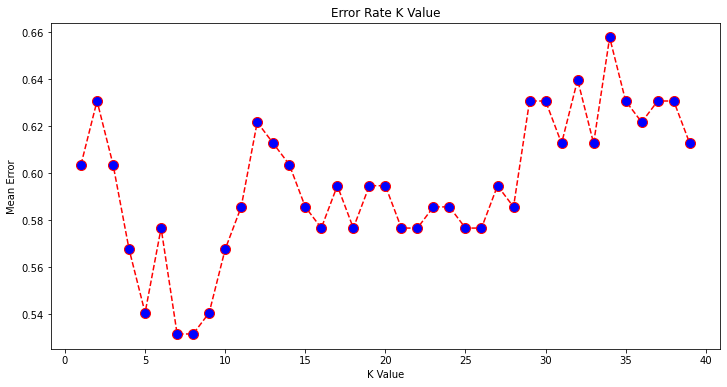

In [180]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnX_train, knny_train)
    pred_i = knn.predict(knnX_test)
    error.append(np.mean(pred_i != knny_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

k = 7 or 8 provide the lowest mean error but there is a lot of noise around theses values. k = 26 provides a realtively low mean error, is near the k = sqrt(n) rule of thumb and seems less subject to noise. 

In [181]:
#Using K = 27
knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc = round(knn.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_knn))
print('Accuracy for test data: {}'.format(test_acc))

Acuracy for training data: 47.91
Accuracy for test data: 40.67


### Support Vector Machine
I used a polynomial kernel with degree 8 here. Other types of kernel peformed very poorly < 20% accuracy so I haven't included them. Using degree 8 was a random choice as there was not much change in accuracy across different degrees. 

In [191]:
#Support Vector Machine Algorithm
svc = SVC(kernel = 'poly', degree=8)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_svc))
print('Accuracy for test data: {}'.format(test_svc))

Acuracy for training data: 40.47
Accuracy for test data: 52.0


### Guassian Naive Bayes

In [192]:
#Gaussian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
print('Acuracy for training data: {}'.format(acc_gaussian))
print('Accuracy for test data: {}'.format(test_gaussian))

Acuracy for training data: 37.39
Accuracy for test data: 46.67


### Decision Tree 

In [193]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_decision_tree))
print('Accuracy for test data: {}'.format(test_decision_tree))

Acuracy for training data: 100.0
Accuracy for test data: 59.33


In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 2  3  1  2  0  0]
 [ 1  2  2  3  0  0]
 [ 1  7 31  9  7  0]
 [ 1  2  7  6  2  0]
 [ 0  0  2  1 22  4]
 [ 0  0  1  1  4 26]]
              precision    recall  f1-score   support

           1       0.40      0.25      0.31         8
           2       0.14      0.25      0.18         8
           3       0.70      0.56      0.63        55
           4       0.27      0.33      0.30        18
           5       0.63      0.76      0.69        29
           6       0.87      0.81      0.84        32

    accuracy                           0.59       150
   macro avg       0.50      0.49      0.49       150
weighted avg       0.63      0.59      0.60       150



### Random Forest

In [194]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_random_forest = round(random_forest.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_random_forest))
print('Accuracy for test data: {}'.format(test_random_forest))

Acuracy for training data: 100.0
Accuracy for test data: 62.67


In [195]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 1  5  0  1  0  1]
 [ 0  4  2  2  0  0]
 [ 0 10 33 12  0  0]
 [ 0  2  7  8  1  0]
 [ 0  0  0  4 19  6]
 [ 0  0  0  3  0 29]]
              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       0.19      0.50      0.28         8
           3       0.79      0.60      0.68        55
           4       0.27      0.44      0.33        18
           5       0.95      0.66      0.78        29
           6       0.81      0.91      0.85        32

    accuracy                           0.63       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.74      0.63      0.65       150



The Decision Tree and Random Forest models are the best estimators of level having about a 10% higher accuracy than then rest. Some take aways:

 - Both of these models are better at predicting the B1, C1, and C2 levels compared to the rest: These had the highest f1 scores which makes sense as around these levels is where the selected feature's typically showed the sharpest changes (lot's of verb tenses are introduced in B1 and the sentence length and number of less common words ramp up in the C levels). To solve this another feature would need to be found that would help distinguish the other levels better.
 - The model was especially poor at recalling A1 texts: This was likely due to the limited number of samples for training which seemingly were on average below the usual difficulty. Gathering more data in this regard would likely help a lot. 
 - The model rarely estimated the texts more than 1 grade out from either side. It predicted the correct Level within 1 grade 94% of the time.

## As 3 levels: Beginner, Intermediate, Hard

In [196]:
df_train = pd.read_csv(r'./complete_train_set.csv')
df_test = pd.read_csv(r'./complete_test_set.csv')

In [197]:
#Group the grades by letter (A1 and A2 = beginner, B1 and B2 = intermediate, C1 and C2 = advanced)
level_mapping = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3}
df_test['Level'] = df_test['Level'].map(level_mapping)
df_train['Level'] = df_train['Level'].map(level_mapping)

### K Nearest Neighbours

In [198]:
X_train = df_train.drop("Level", axis=1)
Y_train = df_train["Level"]
X_test  = df_test.drop("Level", axis=1)
Y_test = df_test["Level"]

In [199]:
#Using a train_test_split on the seen data to find the ideal value for number of neighbours
#This avoids optimising on the unseen data
knnX_train, knnX_test, knny_train, knny_test = train_test_split(X_train, Y_train, test_size=0.20)

scaler = StandardScaler()
scaler.fit(knnX_train)

#Scaling the features
knnX_train = scaler.transform(knnX_train)
knnX_test = scaler.transform(knnX_test)

Text(0, 0.5, 'Mean Error')

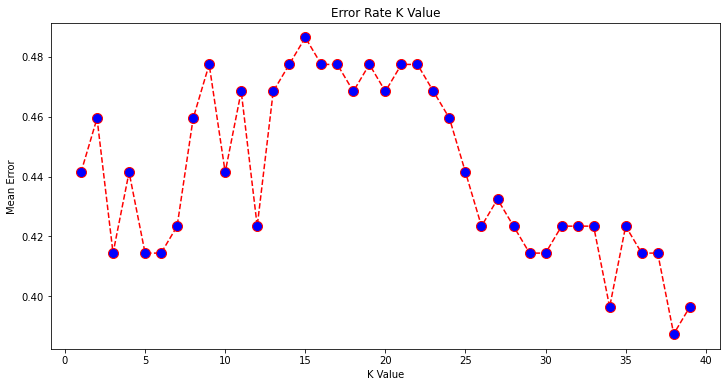

In [200]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnX_train, knny_train)
    pred_i = knn.predict(knnX_test)
    error.append(np.mean(pred_i != knny_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [201]:
#Using K=30
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc = round(knn.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_knn))
print('Accuracy for test data: {}'.format(test_acc))

Acuracy for training data: 67.33
Accuracy for test data: 69.33


### Support Vector Machine

In [203]:
#Support Vector Machine Algorithm
svc = SVC(kernel = 'poly', degree=8)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_svc = round(svc.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_svc))
print('Accuracy for test data: {}'.format(test_svc))

Acuracy for training data: 59.53
Accuracy for test data: 68.0


### Guassian Naive Bayes

In [204]:
#Gaussian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_guassian = round(gaussian.score(X_test, Y_test) * 100, 2)
print('Acuracy for training data: {}'.format(acc_gaussian))
print('Accuracy for test data: {}'.format(test_guassian))

Acuracy for training data: 68.78
Accuracy for test data: 77.33


### Decision Tree

In [205]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_decision_tree = round(decision_tree.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_decision_tree))
print('Accuracy for test data: {}'.format(test_decision_tree))

Acuracy for training data: 100.0
Accuracy for test data: 76.67


### Random Forest

In [206]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_random_forest = round(random_forest.score(X_test,Y_test)*100, 2)
print('Acuracy for training data: {}'.format(acc_random_forest))
print('Accuracy for test data: {}'.format(test_random_forest))

Acuracy for training data: 100.0
Accuracy for test data: 85.33


In [207]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 9  6  1]
 [ 8 63  2]
 [ 0  5 56]]
              precision    recall  f1-score   support

           1       0.53      0.56      0.55        16
           2       0.85      0.86      0.86        73
           3       0.95      0.92      0.93        61

    accuracy                           0.85       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.86      0.85      0.85       150



### Conclusion

The Random Forest Algorithm produced the most accurate model for both cases: 62.67% for the 6 different levels and 85.33% for the 3 different levels. Personally, I find these results very satisfactory, particularly for the 6 level case taking into account the fact that it would predict within 1 level of error 94% of the time. This degree of accuracy would be useful for a language learner/teacher as they could be confident that what they were reading was within their capabilities, if maybe a bit difficult or easy.

Looking at the f1 scores for the predictions on a level by level basis the model was clearly let down by the lower grades: A1 and A2. This was likely because there were 20% as many A1 texts using in the training compared to the others. Unfortunately A1 texts are difficult and labour intensive to track down. Should I want to improve this model, my first port of call would be gathering more A1 and A1 texts. 